# Assignment # 12  
Park Juyeon, Department of Statistics and Data Science, 2022311137

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

pd.options.display.float_format = '{:.5f}'.format
np.set_printoptions(suppress=True)
warnings.filterwarnings(action='ignore')
plt.rcParams['figure.facecolor'] = 'white'

----

# Q1.
### Using Fisher’s Iris Data (Table 11.5), answer the following questions. Note the class membership is already known. However, you may pretend the membership is unknown for the purpose of cluster analysis.

### Read data

In [2]:
iris = pd.read_csv('iris.dat', delim_whitespace = True, header = None)
# Class_name = ['setosa', 'versicolor', 'virginica']
iris.columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class']  # ["setosa", 'versicolor', 'virginica']
# iris.insert(0, 'ID', iris.index)
X = iris.iloc[:, :-1]
y = iris.iloc[:, -1]
X

,Sepal length,Sepal width,Petal length,Petal width
0,5.10000,3.50000,1.40000,0.20000
1,4.90000,3.00000,1.40000,0.20000
2,4.70000,3.20000,1.30000,0.20000
3,4.60000,3.10000,1.50000,0.20000
4,5.00000,3.60000,1.40000,0.20000
...,...,...,...,...
145,6.70000,3.00000,5.20000,2.30000
146,6.30000,2.50000,5.00000,1.90000
147,6.50000,3.00000,5.20000,2.00000
148,6.20000,3.40000,5.40000,2.30000


### Standardization

In [3]:
# Standardization; essential in clustering
scaler = MinMaxScaler()
X_transformed = scaler.fit_transform(X)
X_transformed = pd.DataFrame(X_transformed)
# X_transformed.insert(0, 'ID', X_transformed.index)
X_transformed.columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']
X_transformed

,Sepal length,Sepal width,Petal length,Petal width
0,0.22222,0.62500,0.06780,0.04167
1,0.16667,0.41667,0.06780,0.04167
2,0.11111,0.50000,0.05085,0.04167
3,0.08333,0.45833,0.08475,0.04167
4,0.19444,0.66667,0.06780,0.04167
...,...,...,...,...
145,0.66667,0.41667,0.71186,0.91667
146,0.55556,0.20833,0.67797,0.75000
147,0.61111,0.41667,0.71186,0.79167
148,0.52778,0.58333,0.74576,0.91667


## a. Perform hierarchical cluster analysis using centroid method. How many clusters do you find?

To conduct hierarchical cluster analysis, we can decide the number of clusters using Dendrogram. By using threshold = 0.4, we find 3 clusters.

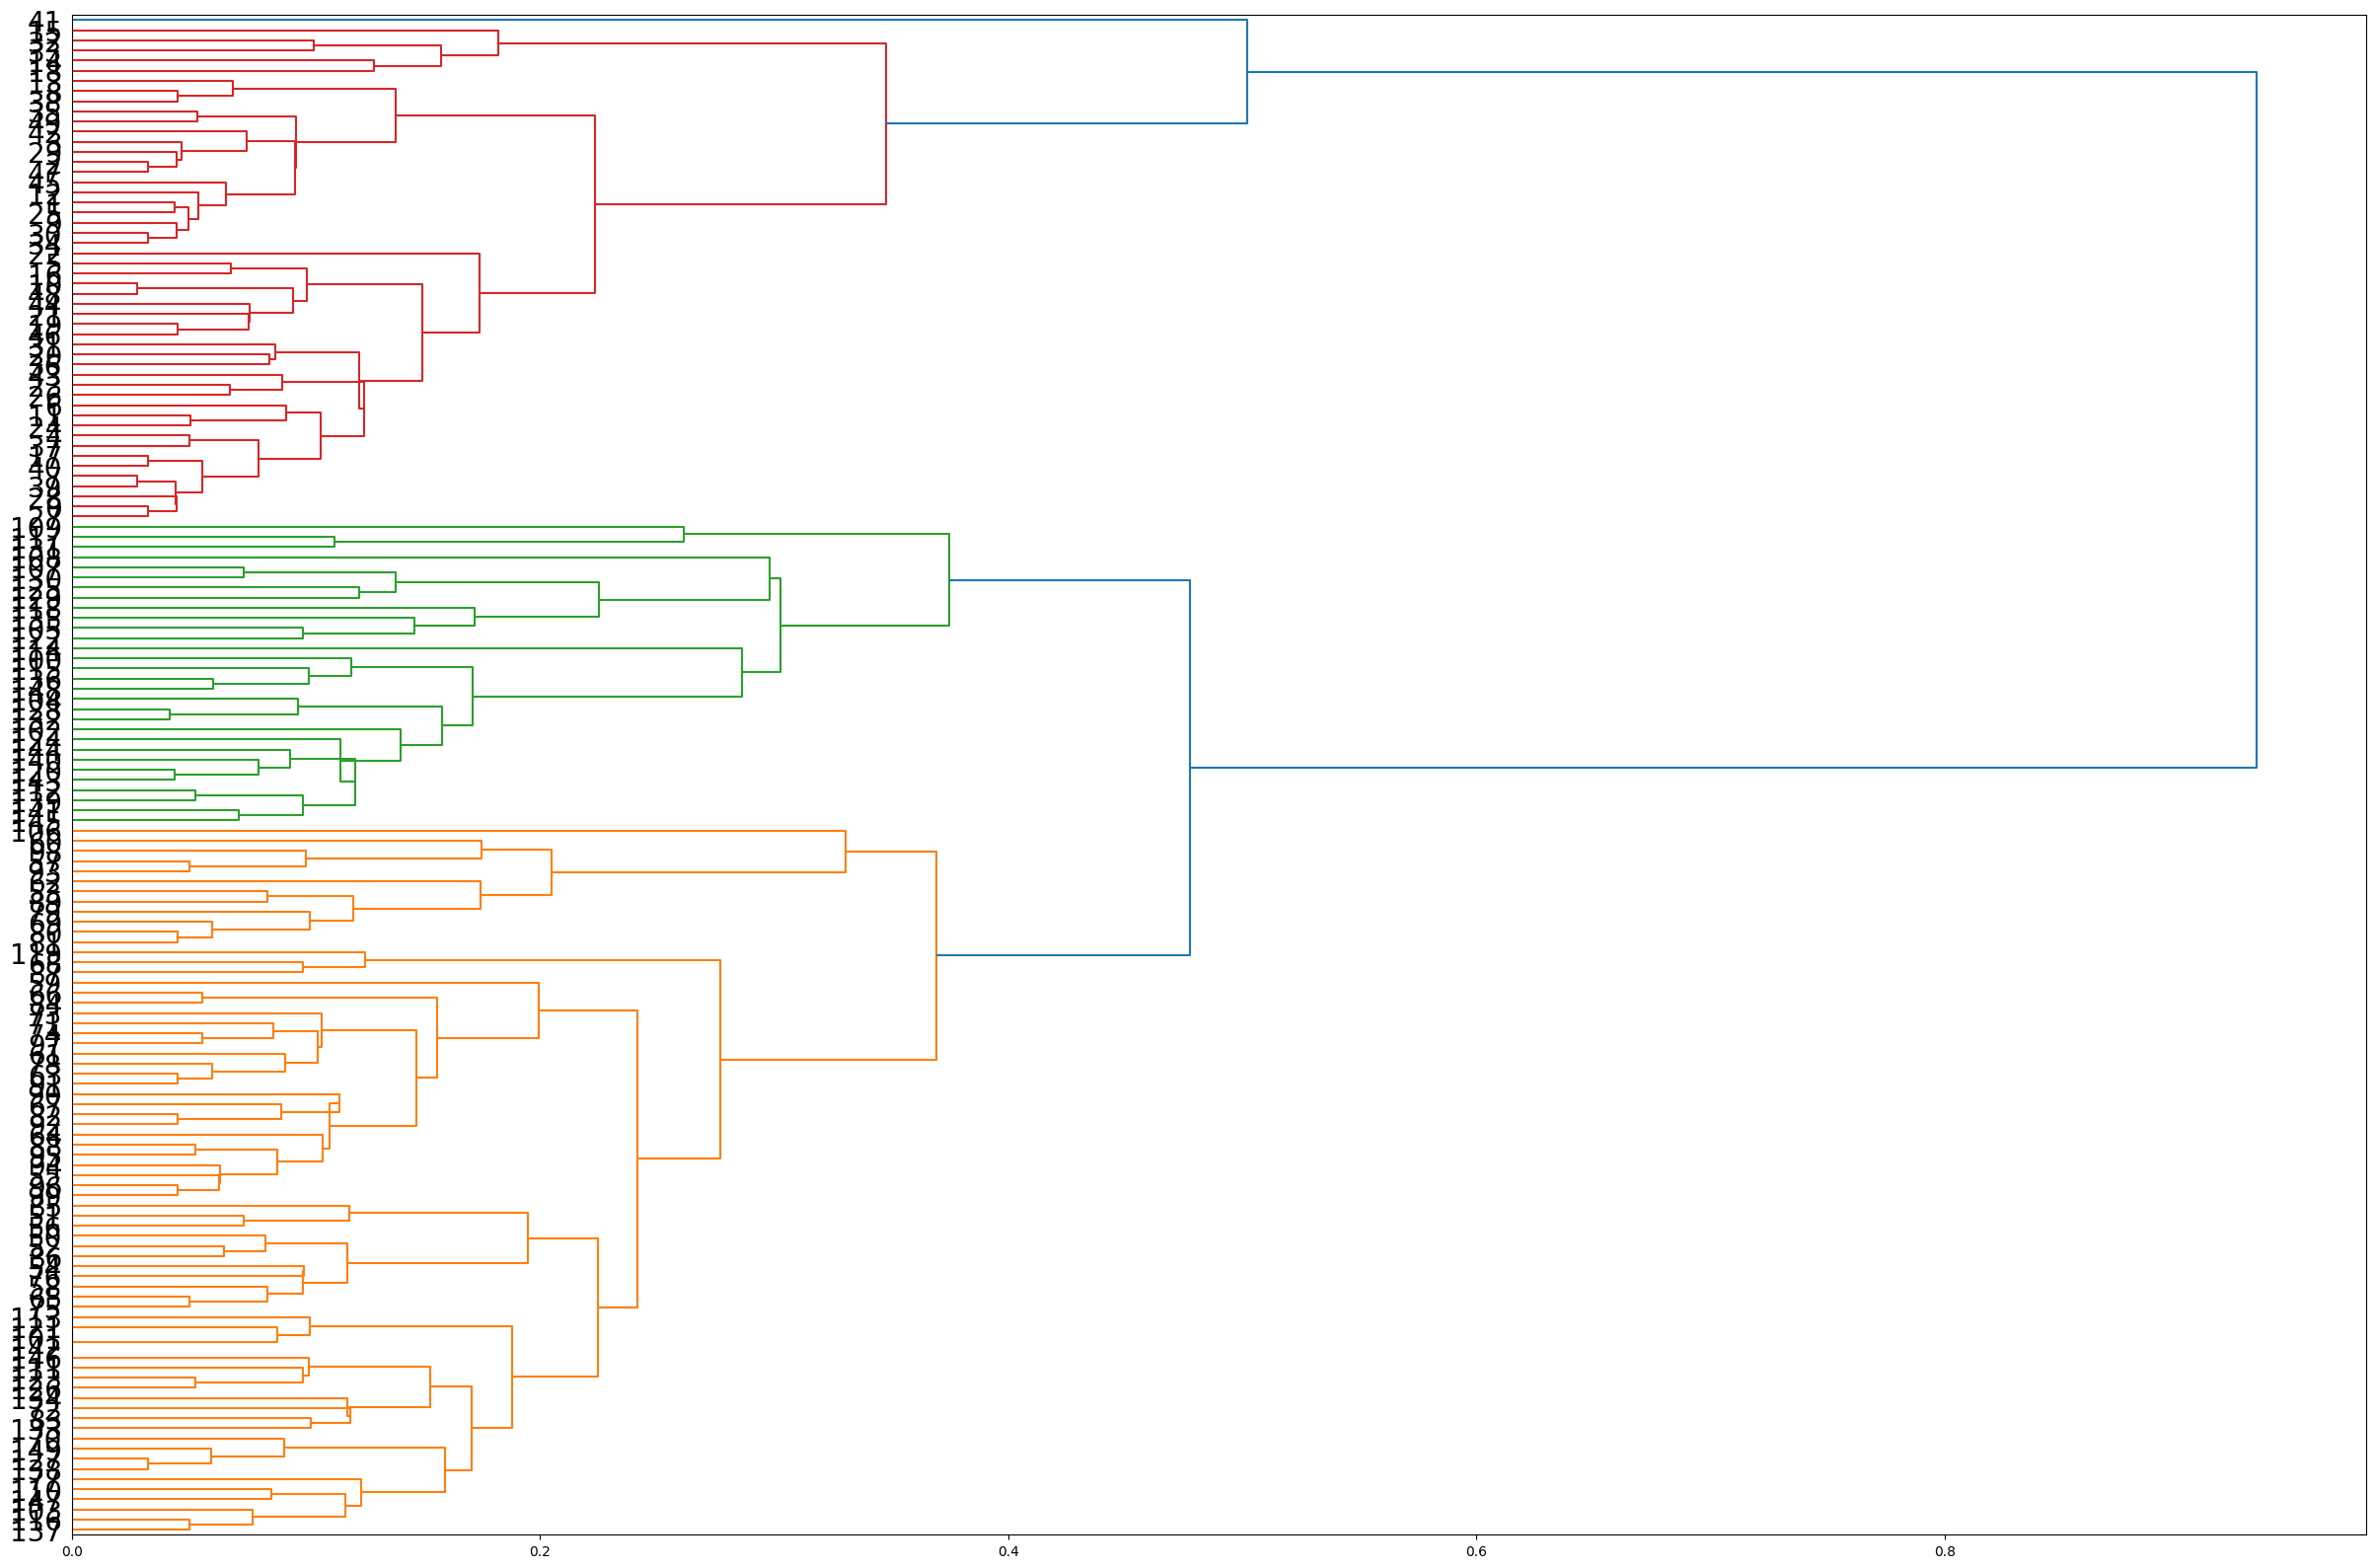

In [4]:
# Hierarchical clustering
linked = linkage(X_transformed, method='centroid')

# Visualization
plt.figure(figsize=(30, 20))
dendrogram(linked, 
           orientation='right',
           count_sort='descending',
           distance_sort='descending',
           labels=iris.index,
           leaf_font_size=20, 
           color_threshold=0.4)
plt.show()

# We find 3 clusters.

## b. Plot the first two principal component scores with the cluster label.

### Predict the cluster label using k = 3 

In [5]:
from sklearn.cluster import AgglomerativeClustering
hclus = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'average')
y_pred = hclus.fit_predict(X_transformed)
y_pred = pd.DataFrame(y_pred+1, columns = ['cluster_centroid'])
Xgroup = X_transformed.join(y_pred)
Xgroup

,Sepal length,Sepal width,Petal length,Petal width,cluster_centroid
0,0.22222,0.62500,0.06780,0.04167,1
1,0.16667,0.41667,0.06780,0.04167,1
2,0.11111,0.50000,0.05085,0.04167,1
3,0.08333,0.45833,0.08475,0.04167,1
4,0.19444,0.66667,0.06780,0.04167,1
...,...,...,...,...,...
145,0.66667,0.41667,0.71186,0.91667,3
146,0.55556,0.20833,0.67797,0.75000,2
147,0.61111,0.41667,0.71186,0.79167,3
148,0.52778,0.58333,0.74576,0.91667,3


### PCA and plot with cluster label

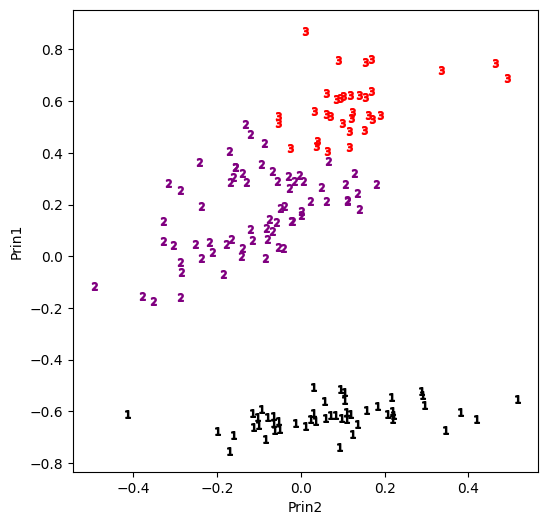

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pc = pca.fit_transform(X_transformed)

group_indicator = Xgroup['cluster_centroid']
plt.figure(figsize=(6, 6))
plt.xlabel('Prin2'); plt.ylabel('Prin1')
color = {1: 'black', 2: 'purple', 3: 'red'}
for i in range(len(X_transformed)):
    plt.scatter(pc[i, 1], pc[i, 0],
                marker=f'${group_indicator[i]}$',
                s=30, 
                c=color[group_indicator[i]]
                )

It seems clustering is well down.

## c. Compare the clusters with the actual class using confusion matrix.

Some observations in Group 2 and 3 are incorrectly clustered. In the PCA group in (b), it seems that the boundary between Group 2 and 3 is adjacent.

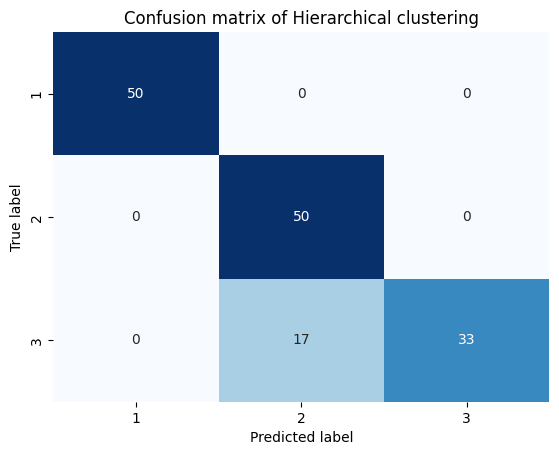

<Figure size 200x200 with 0 Axes>

In [7]:
# Confusion matrix
C1 = pd.DataFrame(confusion_matrix(y, y_pred),
                         index=[1, 2, 3],
                         columns=[1, 2, 3])

# Create heatmap of confusion matrix
fig, ax = plt.subplots()
plt.figure(figsize=(2, 2))
sns.heatmap(C1, annot=True, fmt='d', cmap='Blues', 
            ax=ax, cbar=False, xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_title('Confusion matrix of Hierarchical clustering')

plt.show()

## d. Perform the K-means cluster analysis with the number of clusters you acquired in (a).

In [8]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_transformed)
y_pred = pd.DataFrame(kmeans.labels_ + 1, columns=['cluster'])
Xkmean = X_transformed.join(y_pred)
Xkmean

,Sepal length,Sepal width,Petal length,Petal width,cluster
0,0.22222,0.62500,0.06780,0.04167,1
1,0.16667,0.41667,0.06780,0.04167,1
2,0.11111,0.50000,0.05085,0.04167,1
3,0.08333,0.45833,0.08475,0.04167,1
4,0.19444,0.66667,0.06780,0.04167,1
...,...,...,...,...,...
145,0.66667,0.41667,0.71186,0.91667,3
146,0.55556,0.20833,0.67797,0.75000,2
147,0.61111,0.41667,0.71186,0.79167,3
148,0.52778,0.58333,0.74576,0.91667,3


## e. Plot the first two principal component scores with the cluster label.

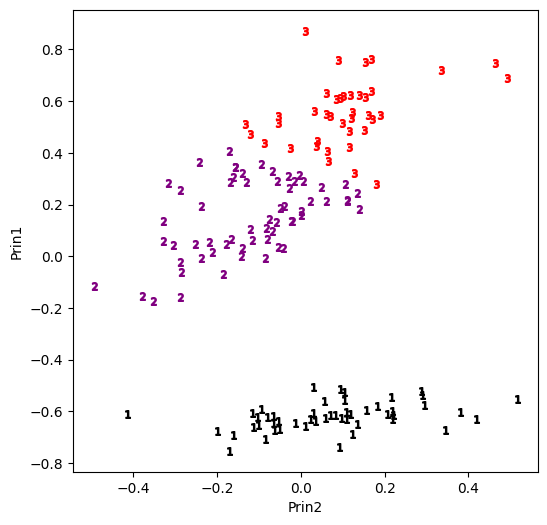

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pc = pca.fit_transform(X_transformed)

group_indicator = Xkmean['cluster']
plt.figure(figsize=(6, 6))
plt.xlabel('Prin2'); plt.ylabel('Prin1')
color = {1: 'black', 2: 'purple', 3: 'red'}
for i in range(len(X_transformed)):
    plt.scatter(pc[i, 1], pc[i, 0],
                marker=f'${group_indicator[i]}$',
                s=30, 
                c=color[group_indicator[i]]
                )

### Confusion matrix

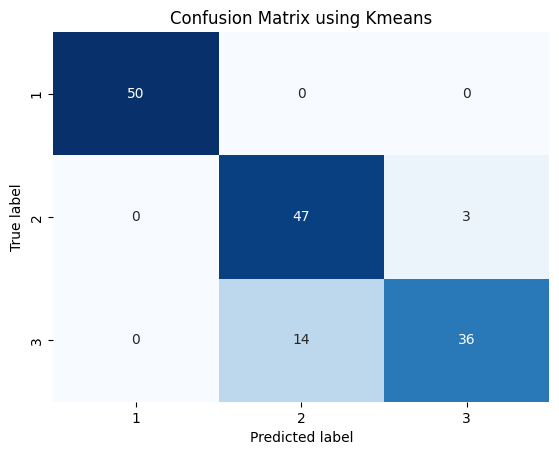

<Figure size 200x200 with 0 Axes>

In [10]:
C2 = pd.DataFrame(confusion_matrix(y, y_pred),
                         index=[1, 2, 3],
                         columns=[1, 2, 3])

# Create heatmap of confusion matrix
fig, ax = plt.subplots()
plt.figure(figsize=(2, 2))
sns.heatmap(C2, annot=True, fmt='d', cmap='Blues', 
            ax=ax, cbar=False, xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_title('Confusion Matrix using Kmeans')

plt.show()

Like the hierarchical clustering method in above, some observations in Group 2 and 3 are incorrectly clustered too.

## f. Compare the results of the two cluster analyses using confusion matrix. Do they produce similar clusters?

Overall, the two cluster analyses seem to produce similar results. However, as seen above, the boundary between Group 2 and 3 is ambiguous, so there is a difference in predictions for Group 2 and 3.

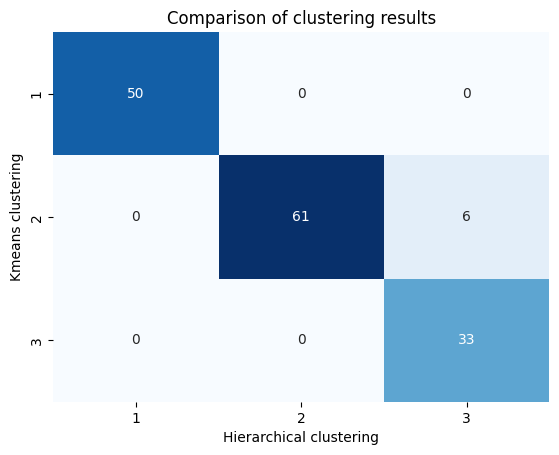

<Figure size 200x200 with 0 Axes>

In [11]:
# confusion matrix
C3 = pd.DataFrame(confusion_matrix(Xgroup['cluster_centroid'], Xkmean['cluster']),
                  index=[1, 2, 3],
                  columns=[1, 2, 3])

# Create heatmap of confusion matrix
fig, ax = plt.subplots()
plt.figure(figsize=(2, 2))
sns.heatmap(C3, annot=True, fmt='d', cmap='Blues', 
            ax=ax, cbar=False, xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
ax.set_xlabel('Hierarchical clustering')
ax.set_ylabel('Kmeans clustering')
ax.set_title('Comparison of clustering results')

plt.show()